In [378]:
#Importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")

In [379]:
#Importing the data
data_train=pd.read_excel("Data_Train.xlsx")

In [380]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [381]:
#Importing another data
data_test=pd.read_excel("Test_set.xlsx")

In [382]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [383]:
data_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [384]:
data_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [385]:
#Now merge the data-->
final_data=data_train.append(data_test)

C:\Users\RAFIKUL\AppData\Local\Temp\ipykernel_7076\2277413092.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data=data_train.append(data_test)


In [386]:
final_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [387]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [388]:
#Features Engineering--->
#First i will focus on Date_of_Journey column
#from info i can see that Date_of_Journey is an object
#first i will devide into 3 varibale as a date month and year
#and then i will change the data type in int

In [389]:
#Here i,m creating three new variables date month and year 
#and assigened the value from the final data
#Here i used str[0] for only cut off the pirst value from date
#and split option to mentioned after which sign data should split
final_data["Date"]=final_data["Date_of_Journey"].str.split("/").str[0]
final_data["Month"]=final_data["Date_of_Journey"].str.split("/").str[1]
final_data["Year"]=final_data["Date_of_Journey"].str.split("/").str[2]

In [390]:
final_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [391]:
#Now i'm going to change the new all three variables(Date,Month,Year) datatype into int
final_data["Date"]=final_data["Date"].astype(int)
final_data["Month"]=final_data["Month"].astype(int)
final_data["Year"]=final_data["Year"].astype(int)

In [392]:
final_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [393]:
#Now i anymore required Date_of_Journey features beacuse 
#already i take data from there and devided it
final_data=final_data.drop(columns={"Date_of_Journey"})

In [394]:
final_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [395]:
#Now time for change the Arrival_Time variable
#Arrival_Time variabl is present in data in time
#the date format so,i already have the date i just 
#want the time from Arrival_Time variable in between 
#time and date there have a blank space so i'll split 
#the data when blank space will be occur in Arrival_Time column.
final_data["Ariv_Time"]=final_data["Arrival_Time"].str.split(" ").str[0]

In [396]:
final_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Ariv_Time
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,01:10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13:15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,04:25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23:30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21:35


In [397]:
#Here i dropped the Arrival_Time column beacse i already 
#seperated  the main data into new variable Ariv_Time
final_data=final_data.drop(columns={"Arrival_Time"},axis=1)

In [398]:
final_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Ariv_Time
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,01:10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13:15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,04:25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23:30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21:35


In [399]:
#Here i just rename the Ariv_Time variable into his previous name fo better understanding!
final_data=final_data.rename(columns={"Ariv_Time":"Arrival_Time"})

In [400]:
final_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Time
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,01:10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13:15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,04:25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23:30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21:35


In [401]:
#Now again i have to split the Arrival_Time by hour and min
#in same process
final_data["Arrival_Hour"]=final_data["Arrival_Time"].str.split(":").str[0]
final_data["Arrival_Min"]=final_data["Arrival_Time"].str.split(":").str[1]

In [402]:
final_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Time,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,01:10,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13:15,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,04:25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23:30,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21:35,21,35


In [403]:
#Now no need of Arrival_Time variable because already 
#i split the Arrival_Time data into Arrival_Hour and 
#Arrival_Min so, dropped the Arrival_Time variable
final_data=final_data.drop(columns={"Arrival_Time"},axis=1)

In [404]:
final_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [405]:
#Now change the data type for Arrival_Hour and Arrival_Min into int
final_data["Arrival_Hour"]=final_data["Arrival_Hour"].astype(int)
final_data["Arrival_Min"]=final_data["Arrival_Min"].astype(int)

In [406]:
#Now time to spli Dep_Time into hour and min
final_data["Dep_Hour"]=final_data["Dep_Time"].str.split(":").str[0]
final_data["Dep_Min"]=final_data["Dep_Time"].str.split(":").str[1]

In [407]:
final_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [408]:
#Now dropped Dep_Time variable cause we already split the data into Dep_Hour and Dep_Min
final_data=final_data.drop(columns={"Dep_Time"},axis=1)

In [409]:
final_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [410]:
#Now change the data type for Dep_Hour and Dep_Min
final_data["Dep_Hour"]=final_data["Dep_Hour"].astype(int)
final_data["Dep_Min"]=final_data["Dep_Min"].astype(int)

In [411]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_Hour     13354 non-null  int32  
 12  Arrival_Min      13354 non-null  int32  
 13  Dep_Hour         13354 non-null  int32  
 14  Dep_Min          13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [412]:
#Now let's come to route variable its dificult to manage 
#cuz there have so much place and sometimes it stop 1 maybe 
#2 or 3 place so, i will delete that row i will work with Total_Stops
#variable
final_data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [413]:
#From above observation i can say that non-stop means 0, 
#1 stops mean 1 like that and i will replace missing 
#value there have only one missing value
pd.get_dummies(final_data["Total_Stops"])

,1 stop,2 stops,3 stops,4 stops,non-stop
0,0,0,0,0,1
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
2666,1,0,0,0,0
2667,0,0,0,0,1
2668,1,0,0,0,0
2669,1,0,0,0,0


In [414]:
#I created dummies for Total_Stops variables but
#there have onluy 0 or 1 value i can't use dummies
#here if i used dummies so it for all stops it will
#be show 0 or 1 i want individual value for every 
#catagory(1 stop,2 stop....)
#so, here i will use replace option and there i will
#mentioned all the values for individual catefory
#and for one missing value i'm just assuming it 1 
final_data["Total_Stops"]=final_data["Total_Stops"].map({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4,"NaN":1})

In [415]:
final_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [416]:
#Now i not need the route variable so i'll drop that one
final_data=final_data.drop(columns={"Route"},axis=1)

In [417]:
final_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [418]:
#Now in Duration variable their have hour min format
#so i will change it to minute.

In [419]:
final_data["Duration"].value_counts()

2h 50m     672
1h 30m     493
2h 45m     432
2h 55m     418
2h 35m     399
          ... 
29h 10m      1
32h 55m      1
31h 30m      1
35h 20m      1
32h 25m      1
Name: Duration, Length: 374, dtype: int64

In [420]:
final_data["Duration"].value_counts().index

Index(['2h 50m', '1h 30m', '2h 45m', '2h 55m', '2h 35m', '3h', '2h 20m',
       '2h 30m', '2h 40m', '2h 15m',
       ...
       '41h 20m', '30h 10m', '30h 15m', '28h 30m', '42h 5m', '29h 10m',
       '32h 55m', '31h 30m', '35h 20m', '32h 25m'],
      dtype='object', length=374)

In [421]:
#Here i just split the min and hour in different variable tocalculate the total min
#here i used double slit to remove the h also from hours but does not us in min 
#beacuse there is some issue
final_data["Due_Hour"]=final_data["Duration"].str.split(" ").str[0].str.split("h").str[0]
final_data["Due_Min"]=final_data["Duration"].str.split(" ").str[1]

In [422]:
final_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Due_Hour,Due_Min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50m
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25m
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25m
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45m


In [423]:
# Here have an big issue with data somewhere in data duration is given in 5min only
#Find out by observing the data

In [424]:
#let's check in which row duration of flight is 5min only intead of hour
final_data[final_data["Due_Hour"]=="5m"]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Due_Hour,Due_Min
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m,NaN
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m,NaN


In [425]:
#From above table it's clear that in duration 5m is there
#so i will drop that two row
final_data.drop(2660,axis=0,inplace=True)
final_data.drop(6474,axis=0,inplace=True)

In [439]:
#Now those two rows are deleted
#Now also drop the Duration table cuz we dont need it anymore all 
#data are assigned in Due_Hour and Due_Min variable
final_data.drop(columns={"Duration"},axis=1,inplace=True)

In [427]:
#Now covert data type into int
final_data["Due_Hour"]=final_data["Due_Hour"].astype(int)

In [430]:
#Now converting due_hour into min by just multilying into 60
final_data["Due_Hour"]=final_data["Due_Hour"]*60

In [431]:
final_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Due_Hour,Due_Min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,120,50m
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,420,25m
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,300,25m
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,240,45m


In [435]:
#Now there are few object column left Airline,Source,Destination,
#Additional_Info so i will use sklearn for transformation
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [436]:
final_data["Airline"]=labelencoder.fit_transform(final_data["Airline"])
final_data["Source"]=labelencoder.fit_transform(final_data["Source"])
final_data["Destination"]=labelencoder.fit_transform(final_data["Destination"])
final_data["Additional_Info"]=labelencoder.fit_transform(final_data["Additional_Info"])

In [441]:
final_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Due_Hour,Due_Min
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,120,50m
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,420,25m
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,1140,NaN
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,300,25m
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,240,45m


In [440]:
final_data.shape

(13351, 15)

C:\Users\RAFIKUL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Due_Hour', ylabel='Price'>

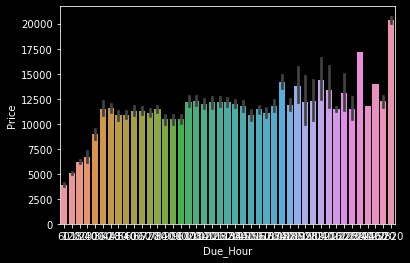

In [443]:
sns.barplot("Due_Hour","Price",data=final_data)

In [ ]:
#)bservation--> By this plot i understand that flight
#price is high when duration of travel is more but in few case price also decreased

C:\Users\RAFIKUL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Price'>

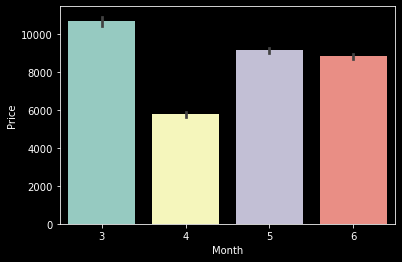

In [445]:
sns.barplot("Month","Price",data=final_data)

In [ ]:
#Observation--> From this graph i can say that in march flish price is high
#and one more thing that maximum people travel in fight in march

C:\Users\RAFIKUL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

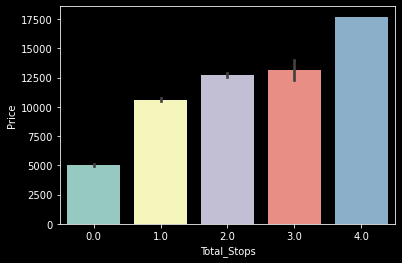

In [448]:
sns.barplot("Total_Stops","Price",data=final_data)

In [ ]:
#Observation---> From this graph it is clear that
#if flisght stop between you destiation then price increased

C:\Users\RAFIKUL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

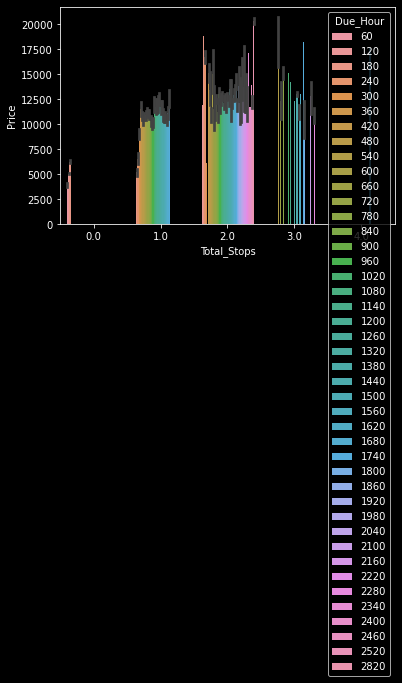

In [449]:
sns.barplot("Total_Stops","Price",hue="Due_Hour",data=final_data)

In [ ]:
#Observation---> From this graph i understand that 
#when flight goes to destination directly or followed
#by one stop then it takes less hur to reach the destination
#and flight price is also low and when flight stop in 
#2 or 3 areas before reach to fila destination
#then duration of ravel increased and price of flight 
#ticket also increased.

In [ ]:
# Process :
#        -First both data import(train,test)
#        -then append both data in a single data(final_data)
#        -then change the  date to an day month and year seperately
#        -then i did departure hour and departure min seperately
#        -then i did arrival hour and arrival min seperately
#        -then i did dueration hour and duration min seperately 
#        -then i change all other catagorical variables into numerical by LabelEncoder(sklearn)       
#        -then i visualized the data for some info.